# Drug Data Analysis for Machine Learning - Part 1
## Focus: Approval Prediction & Price Analysis

This notebook analyzes pharmaceutical data to identify key patterns for:
- Drug Approval Prediction
- Price Prediction Models
- Market Success Factors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('realistic_drug_labels_side_effects.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (1436, 15)
Columns: ['drug_name', 'manufacturer', 'approval_year', 'drug_class', 'indications', 'side_effects', 'dosage_mg', 'administration_route', 'contraindications', 'warnings', 'price_usd', 'batch_number', 'expiry_date', 'side_effect_severity', 'approval_status']


## 1. Data Overview and Quality Assessment

In [2]:
# Basic data information
print("=== DATASET OVERVIEW ===")
print(f"Total Records: {len(df):,}")
print(f"Unique Drugs: {df['drug_name'].nunique():,}")
print(f"Manufacturers: {df['manufacturer'].nunique()}")
print(f"Drug Classes: {df['drug_class'].nunique()}")
print(f"Time Range: {df['approval_year'].min()} - {df['approval_year'].max()}")

# Data types and missing values
print("\n=== DATA QUALITY ===")
print("Missing Values:")
missing_data = df.isnull().sum()
for col, missing in missing_data.items():
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df)*100:.1f}%)")
    
if missing_data.sum() == 0:
    print("  No missing values found!")

print(f"\nDuplicate Records: {df.duplicated().sum()}")

=== DATASET OVERVIEW ===
Total Records: 1,436
Unique Drugs: 1,337
Manufacturers: 10
Drug Classes: 10
Time Range: 1990 - 2024

=== DATA QUALITY ===
Missing Values:
  No missing values found!

Duplicate Records: 0


## 2. Drug Approval Prediction Analysis

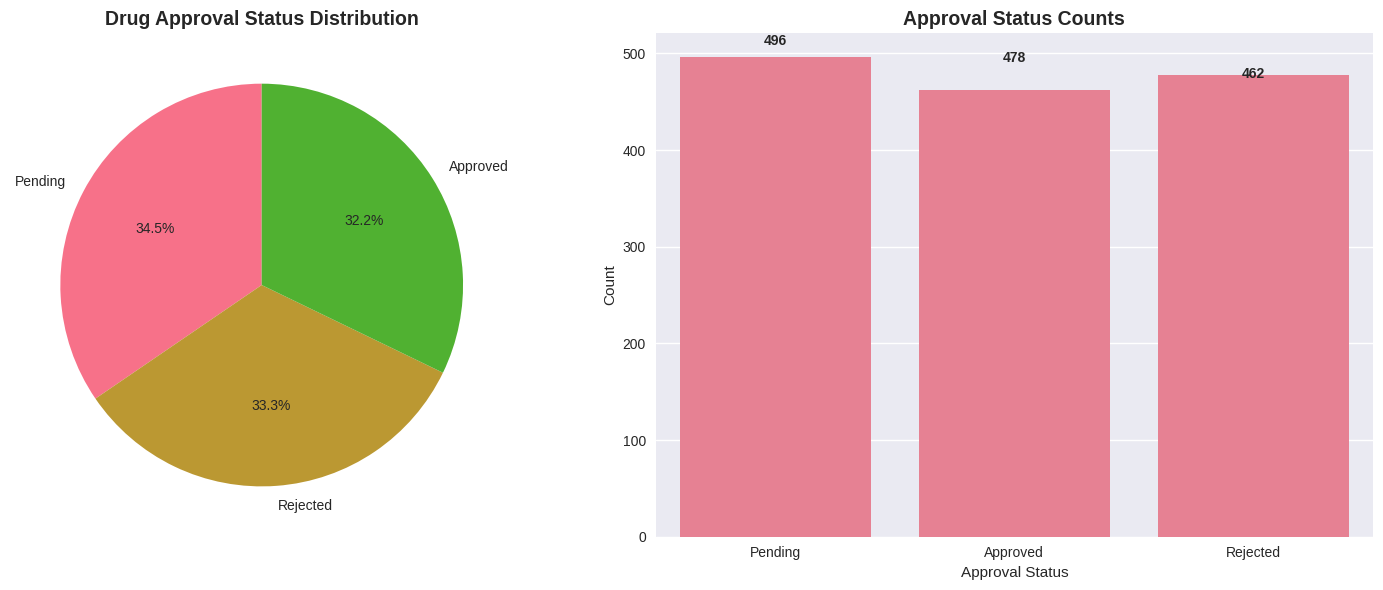

APPROVAL PREDICTION KEY FINDINGS:
  Pending: 496 drugs (34.5%)
  Rejected: 478 drugs (33.3%)
  Approved: 462 drugs (32.2%)


In [3]:
# Approval status distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart of approval status
approval_counts = df['approval_status'].value_counts()
axes[0].pie(approval_counts.values, labels=approval_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Drug Approval Status Distribution', fontsize=14, fontweight='bold')

# Bar chart with counts
sns.countplot(data=df, x='approval_status', ax=axes[1])
axes[1].set_title('Approval Status Counts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Approval Status')
axes[1].set_ylabel('Count')

# Add count labels on bars
for i, v in enumerate(approval_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("APPROVAL PREDICTION KEY FINDINGS:")
for status, count in approval_counts.items():
    print(f"  {status}: {count:,} drugs ({count/len(df)*100:.1f}%)")

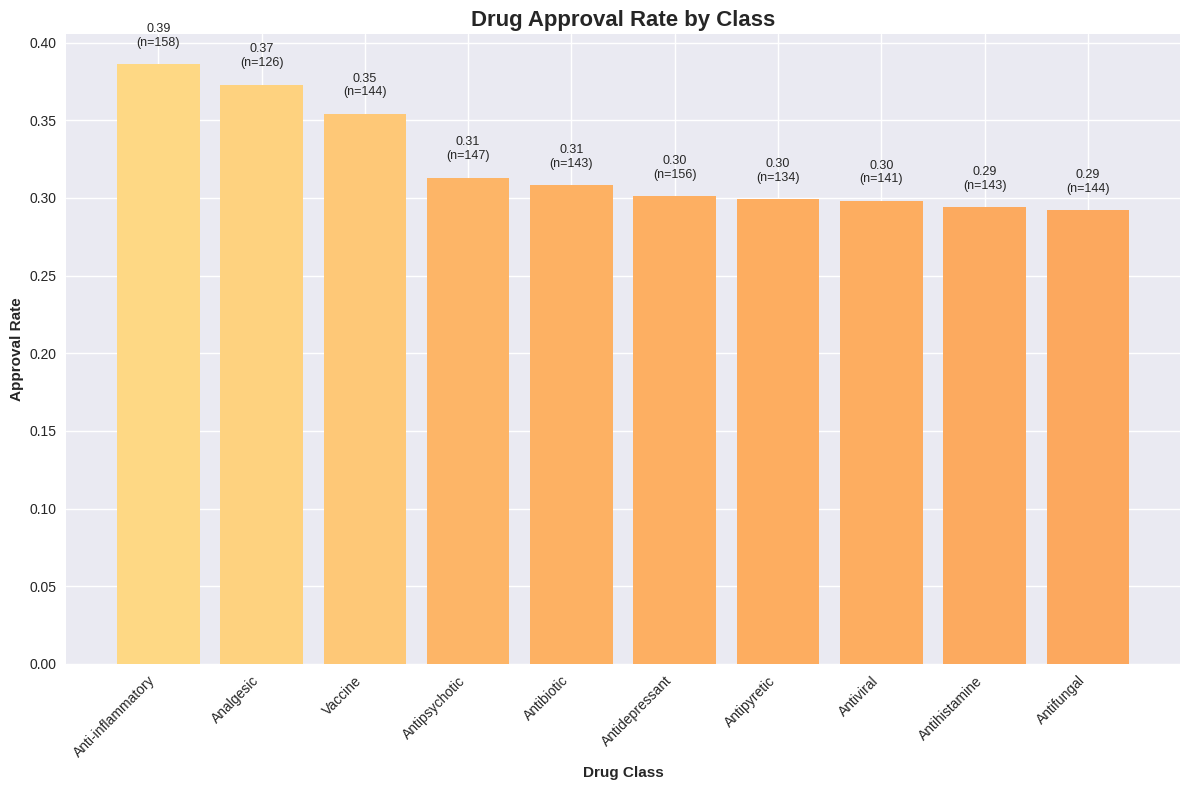


DRUG CLASS APPROVAL INSIGHTS:
                   Approval_Rate  Total_Drugs
drug_class                                   
Anti-inflammatory          0.386          158
Analgesic                  0.373          126
Vaccine                    0.354          144
Antipsychotic              0.313          147
Antibiotic                 0.308          143
Antidepressant             0.301          156
Antipyretic                0.299          134
Antiviral                  0.298          141
Antihistamine              0.294          143
Antifungal                 0.292          144


In [4]:
# Drug class impact on approval
class_approval = df.groupby('drug_class').agg({
    'approval_status': lambda x: (x == 'Approved').mean(),
    'drug_name': 'count'
}).round(3)
class_approval.columns = ['Approval_Rate', 'Total_Drugs']
class_approval = class_approval.sort_values('Approval_Rate', ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(range(len(class_approval)), class_approval['Approval_Rate'], 
              color=plt.cm.RdYlGn(class_approval['Approval_Rate']))
ax.set_xlabel('Drug Class', fontweight='bold')
ax.set_ylabel('Approval Rate', fontweight='bold')
ax.set_title('Drug Approval Rate by Class', fontsize=16, fontweight='bold')
ax.set_xticks(range(len(class_approval)))
ax.set_xticklabels(class_approval.index, rotation=45, ha='right')

# Add value labels on bars
for i, (rate, count) in enumerate(zip(class_approval['Approval_Rate'], class_approval['Total_Drugs'])):
    ax.text(i, rate + 0.01, f'{rate:.2f}\n(n={count})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nDRUG CLASS APPROVAL INSIGHTS:")
print(class_approval)

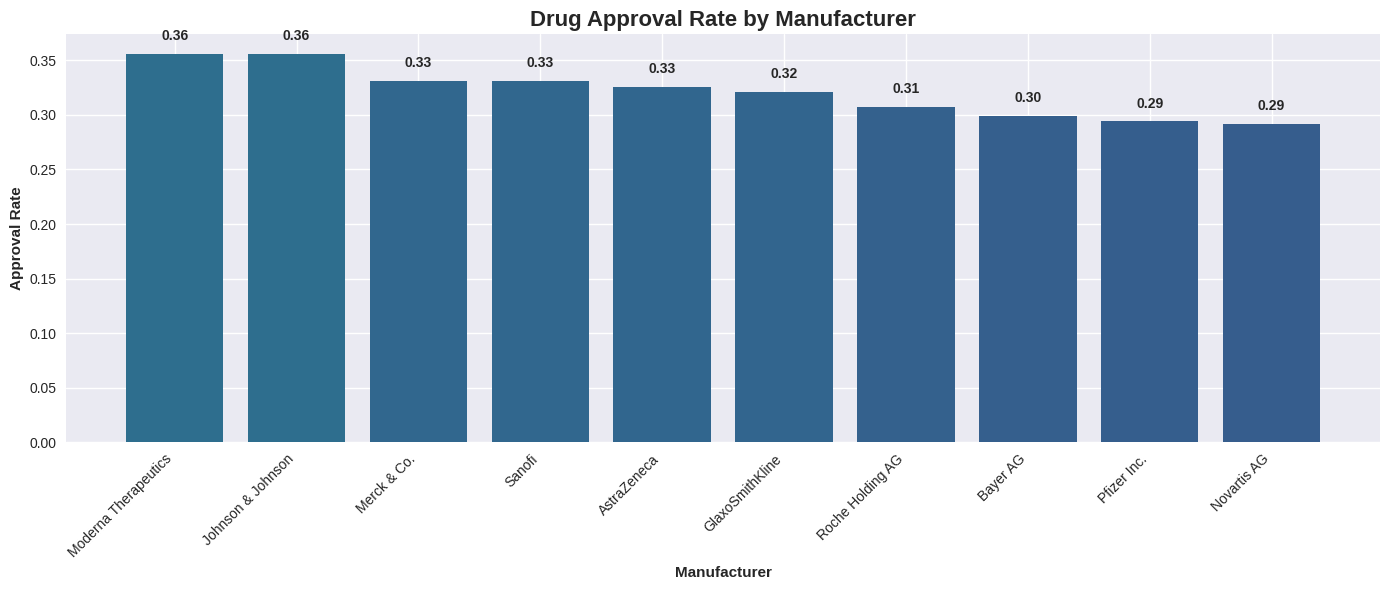


MANUFACTURER APPROVAL INSIGHTS:
                      Approval_Rate  Total_Drugs
manufacturer                                    
Moderna Therapeutics          0.356          146
Johnson & Johnson             0.356          149
Merck & Co.                   0.331          157
Sanofi                        0.331          148
AstraZeneca                   0.326          132
GlaxoSmithKline               0.321          140
Roche Holding AG              0.307          137
Bayer AG                      0.299          147
Pfizer Inc.                   0.294          136
Novartis AG                   0.292          144


In [5]:
# Manufacturer success rates
mfg_approval = df.groupby('manufacturer').agg({
    'approval_status': lambda x: (x == 'Approved').mean(),
    'drug_name': 'count'
}).round(3)
mfg_approval.columns = ['Approval_Rate', 'Total_Drugs']
mfg_approval = mfg_approval.sort_values('Approval_Rate', ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(range(len(mfg_approval)), mfg_approval['Approval_Rate'],
              color=plt.cm.viridis(mfg_approval['Approval_Rate']))
ax.set_xlabel('Manufacturer', fontweight='bold')
ax.set_ylabel('Approval Rate', fontweight='bold')
ax.set_title('Drug Approval Rate by Manufacturer', fontsize=16, fontweight='bold')
ax.set_xticks(range(len(mfg_approval)))
ax.set_xticklabels(mfg_approval.index, rotation=45, ha='right')

# Add value labels
for i, (rate, count) in enumerate(zip(mfg_approval['Approval_Rate'], mfg_approval['Total_Drugs'])):
    ax.text(i, rate + 0.01, f'{rate:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nMANUFACTURER APPROVAL INSIGHTS:")
print(mfg_approval)

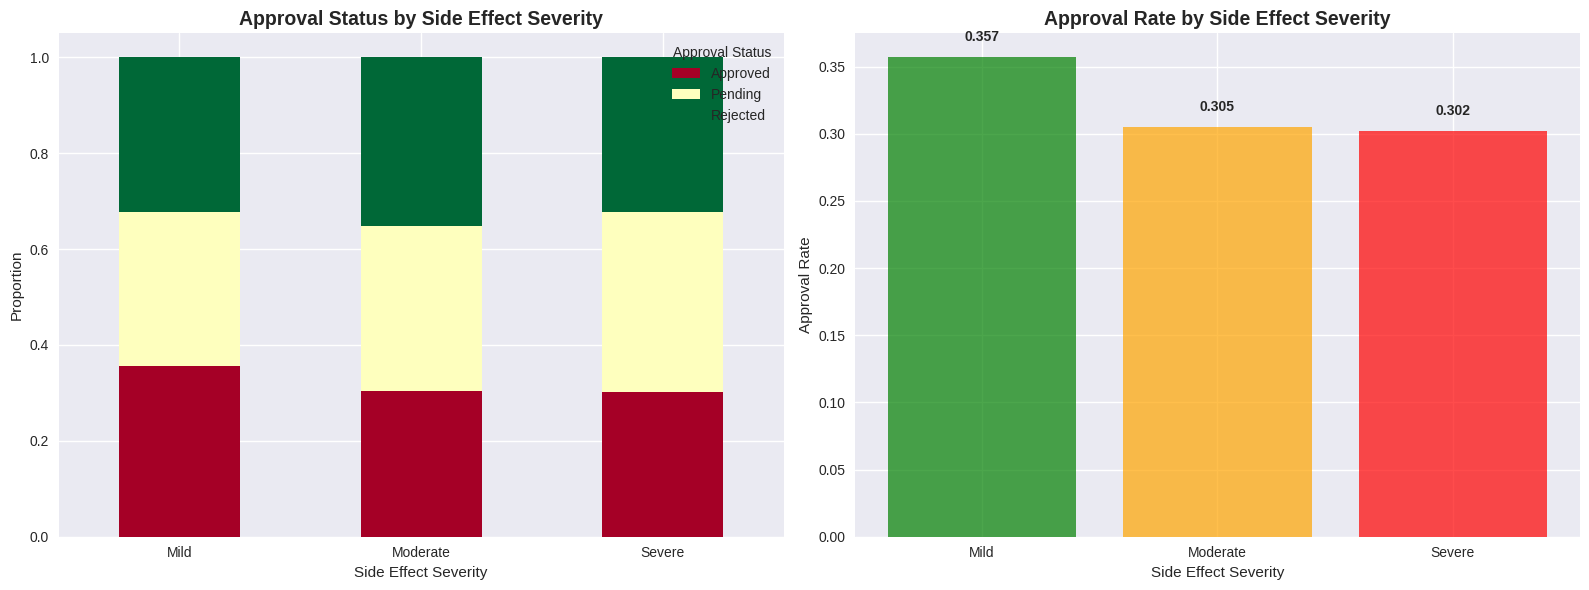


SIDE EFFECT SEVERITY IMPACT:
                      Approval_Rate  Total_Drugs
side_effect_severity                            
Mild                          0.357          490
Moderate                      0.305          482
Severe                        0.302          464


In [6]:
# Side effect severity impact on approval
severity_approval = df.groupby('side_effect_severity').agg({
    'approval_status': lambda x: (x == 'Approved').mean(),
    'drug_name': 'count'
}).round(3)
severity_approval.columns = ['Approval_Rate', 'Total_Drugs']

# Create a more detailed analysis
severity_crosstab = pd.crosstab(df['side_effect_severity'], df['approval_status'], normalize='index')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
severity_crosstab.plot(kind='bar', stacked=True, ax=axes[0], colormap='RdYlGn')
axes[0].set_title('Approval Status by Side Effect Severity', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Side Effect Severity')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Approval Status')
axes[0].tick_params(axis='x', rotation=0)

# Approval rate by severity
severity_order = ['Mild', 'Moderate', 'Severe']
severity_data = [severity_approval.loc[sev, 'Approval_Rate'] if sev in severity_approval.index else 0 for sev in severity_order]
bars = axes[1].bar(severity_order, severity_data, color=['green', 'orange', 'red'], alpha=0.7)
axes[1].set_title('Approval Rate by Side Effect Severity', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Side Effect Severity')
axes[1].set_ylabel('Approval Rate')

# Add value labels
for i, v in enumerate(severity_data):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSIDE EFFECT SEVERITY IMPACT:")
print(severity_approval)

## 3. Price Prediction Analysis

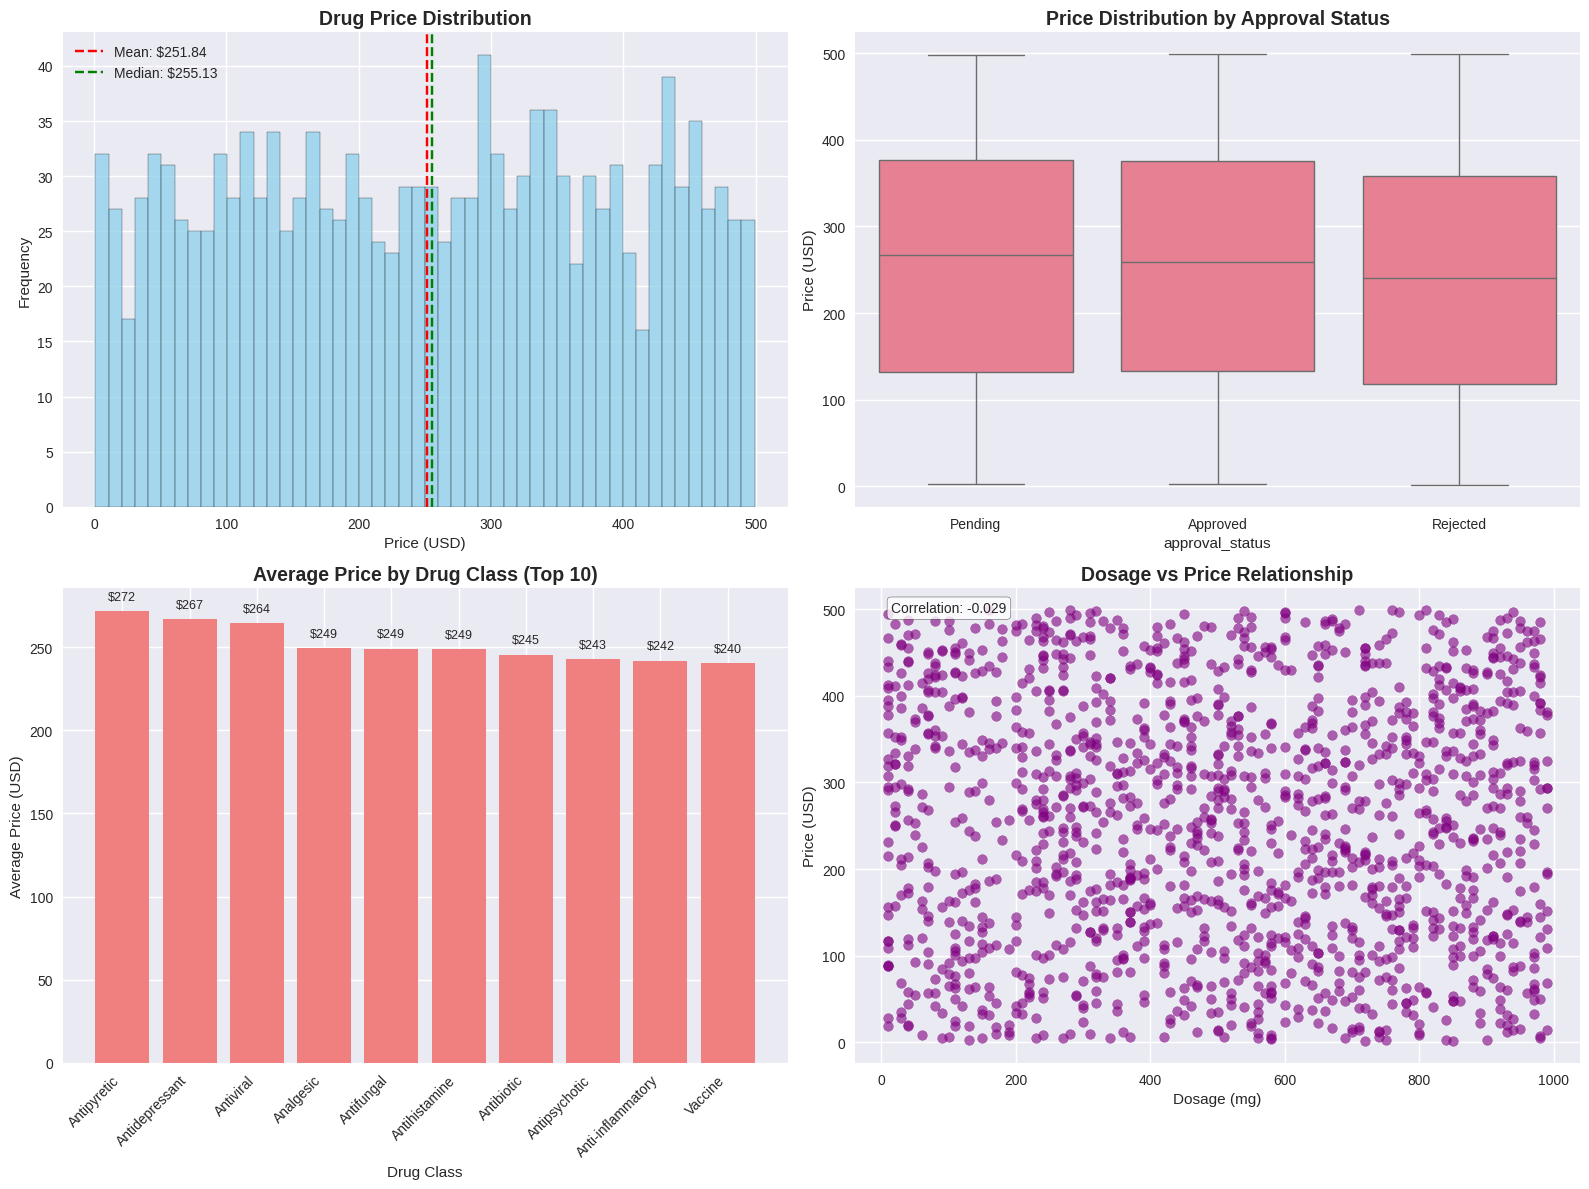

PRICE ANALYSIS KEY FINDINGS:
Price Range: $1.21 - $499.06
Average Price: $251.84
Median Price: $255.13
Standard Deviation: $142.64
Dosage-Price Correlation: -0.029


In [7]:
# Price distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price histogram
axes[0,0].hist(df['price_usd'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Drug Price Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Price (USD)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['price_usd'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price_usd"].mean():.2f}')
axes[0,0].axvline(df['price_usd'].median(), color='green', linestyle='--', label=f'Median: ${df["price_usd"].median():.2f}')
axes[0,0].legend()

# Box plot by approval status
sns.boxplot(data=df, x='approval_status', y='price_usd', ax=axes[0,1])
axes[0,1].set_title('Price Distribution by Approval Status', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Price (USD)')

# Price by drug class (top 10)
class_price = df.groupby('drug_class')['price_usd'].mean().sort_values(ascending=False).head(10)
bars = axes[1,0].bar(range(len(class_price)), class_price.values, color='lightcoral')
axes[1,0].set_title('Average Price by Drug Class (Top 10)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Drug Class')
axes[1,0].set_ylabel('Average Price (USD)')
axes[1,0].set_xticks(range(len(class_price)))
axes[1,0].set_xticklabels(class_price.index, rotation=45, ha='right')

# Add value labels
for i, v in enumerate(class_price.values):
    axes[1,0].text(i, v + 5, f'${v:.0f}', ha='center', va='bottom', fontsize=9)

# Dosage vs Price scatter
axes[1,1].scatter(df['dosage_mg'], df['price_usd'], alpha=0.6, color='purple')
axes[1,1].set_title('Dosage vs Price Relationship', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Dosage (mg)')
axes[1,1].set_ylabel('Price (USD)')

# Add correlation coefficient
corr = df['dosage_mg'].corr(df['price_usd'])
axes[1,1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1,1].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("PRICE ANALYSIS KEY FINDINGS:")
print(f"Price Range: ${df['price_usd'].min():.2f} - ${df['price_usd'].max():.2f}")
print(f"Average Price: ${df['price_usd'].mean():.2f}")
print(f"Median Price: ${df['price_usd'].median():.2f}")
print(f"Standard Deviation: ${df['price_usd'].std():.2f}")
print(f"Dosage-Price Correlation: {corr:.3f}")

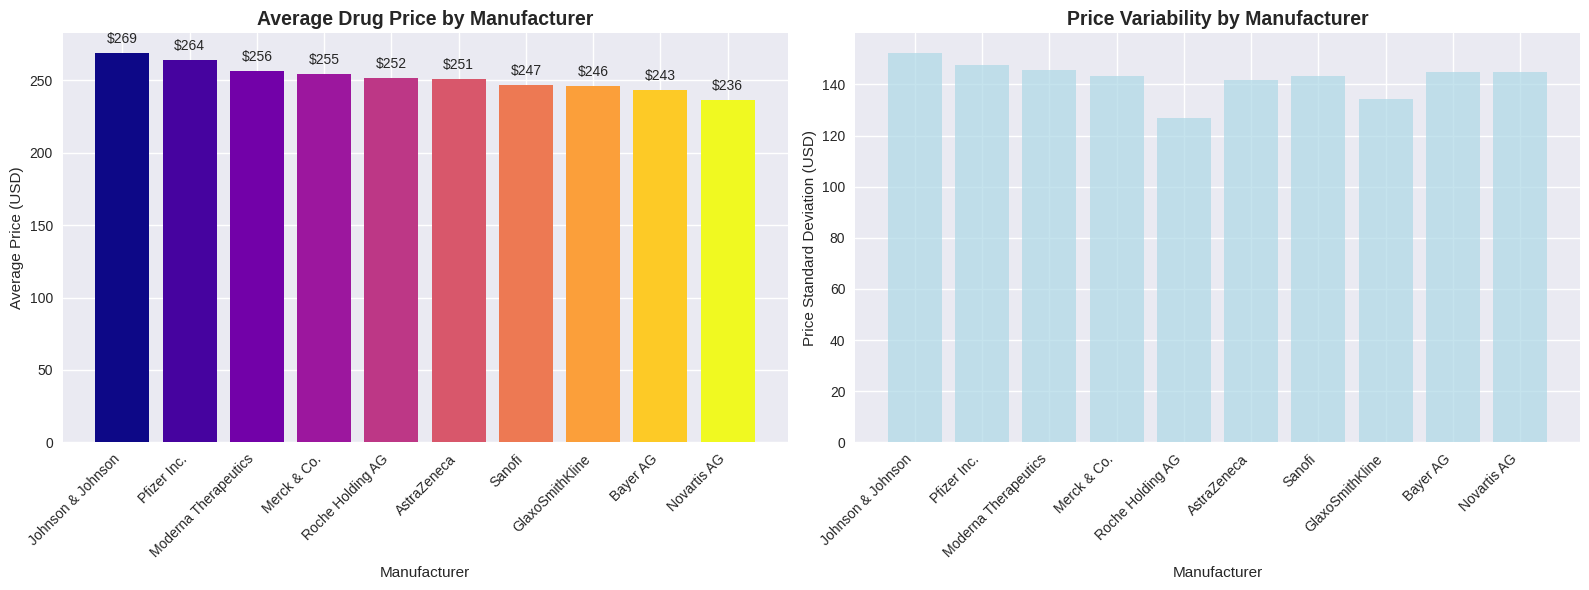


MANUFACTURER PRICING INSIGHTS:
                      Mean_Price  Median_Price  Price_StdDev  Drug_Count
manufacturer                                                            
Johnson & Johnson         269.02        296.73        152.36         149
Pfizer Inc.               264.13        278.78        147.77         136
Moderna Therapeutics      256.32        257.20        145.67         146
Merck & Co.               254.55        267.78        143.39         157
Roche Holding AG          251.67        250.52        126.70         137
AstraZeneca               250.80        250.82        141.71         132
Sanofi                    246.59        252.88        143.13         148
GlaxoSmithKline           245.77        236.46        134.35         140
Bayer AG                  243.12        255.61        144.86         147
Novartis AG               236.32        226.43        145.00         144


In [8]:
# Manufacturer pricing analysis
mfg_price = df.groupby('manufacturer').agg({
    'price_usd': ['mean', 'median', 'std', 'count']
}).round(2)
mfg_price.columns = ['Mean_Price', 'Median_Price', 'Price_StdDev', 'Drug_Count']
mfg_price = mfg_price.sort_values('Mean_Price', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean price by manufacturer
bars = axes[0].bar(range(len(mfg_price)), mfg_price['Mean_Price'], 
                   color=plt.cm.plasma(np.linspace(0, 1, len(mfg_price))))
axes[0].set_title('Average Drug Price by Manufacturer', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Average Price (USD)')
axes[0].set_xticks(range(len(mfg_price)))
axes[0].set_xticklabels(mfg_price.index, rotation=45, ha='right')

# Add value labels
for i, v in enumerate(mfg_price['Mean_Price']):
    axes[0].text(i, v + 5, f'${v:.0f}', ha='center', va='bottom', fontsize=10)

# Price variability (std dev) by manufacturer
bars = axes[1].bar(range(len(mfg_price)), mfg_price['Price_StdDev'], 
                   color='lightblue', alpha=0.7)
axes[1].set_title('Price Variability by Manufacturer', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Manufacturer')
axes[1].set_ylabel('Price Standard Deviation (USD)')
axes[1].set_xticks(range(len(mfg_price)))
axes[1].set_xticklabels(mfg_price.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nMANUFACTURER PRICING INSIGHTS:")
print(mfg_price)

## 4. Market Success Analysis

Overall Market Success Rate: 0.164 (16.4%)


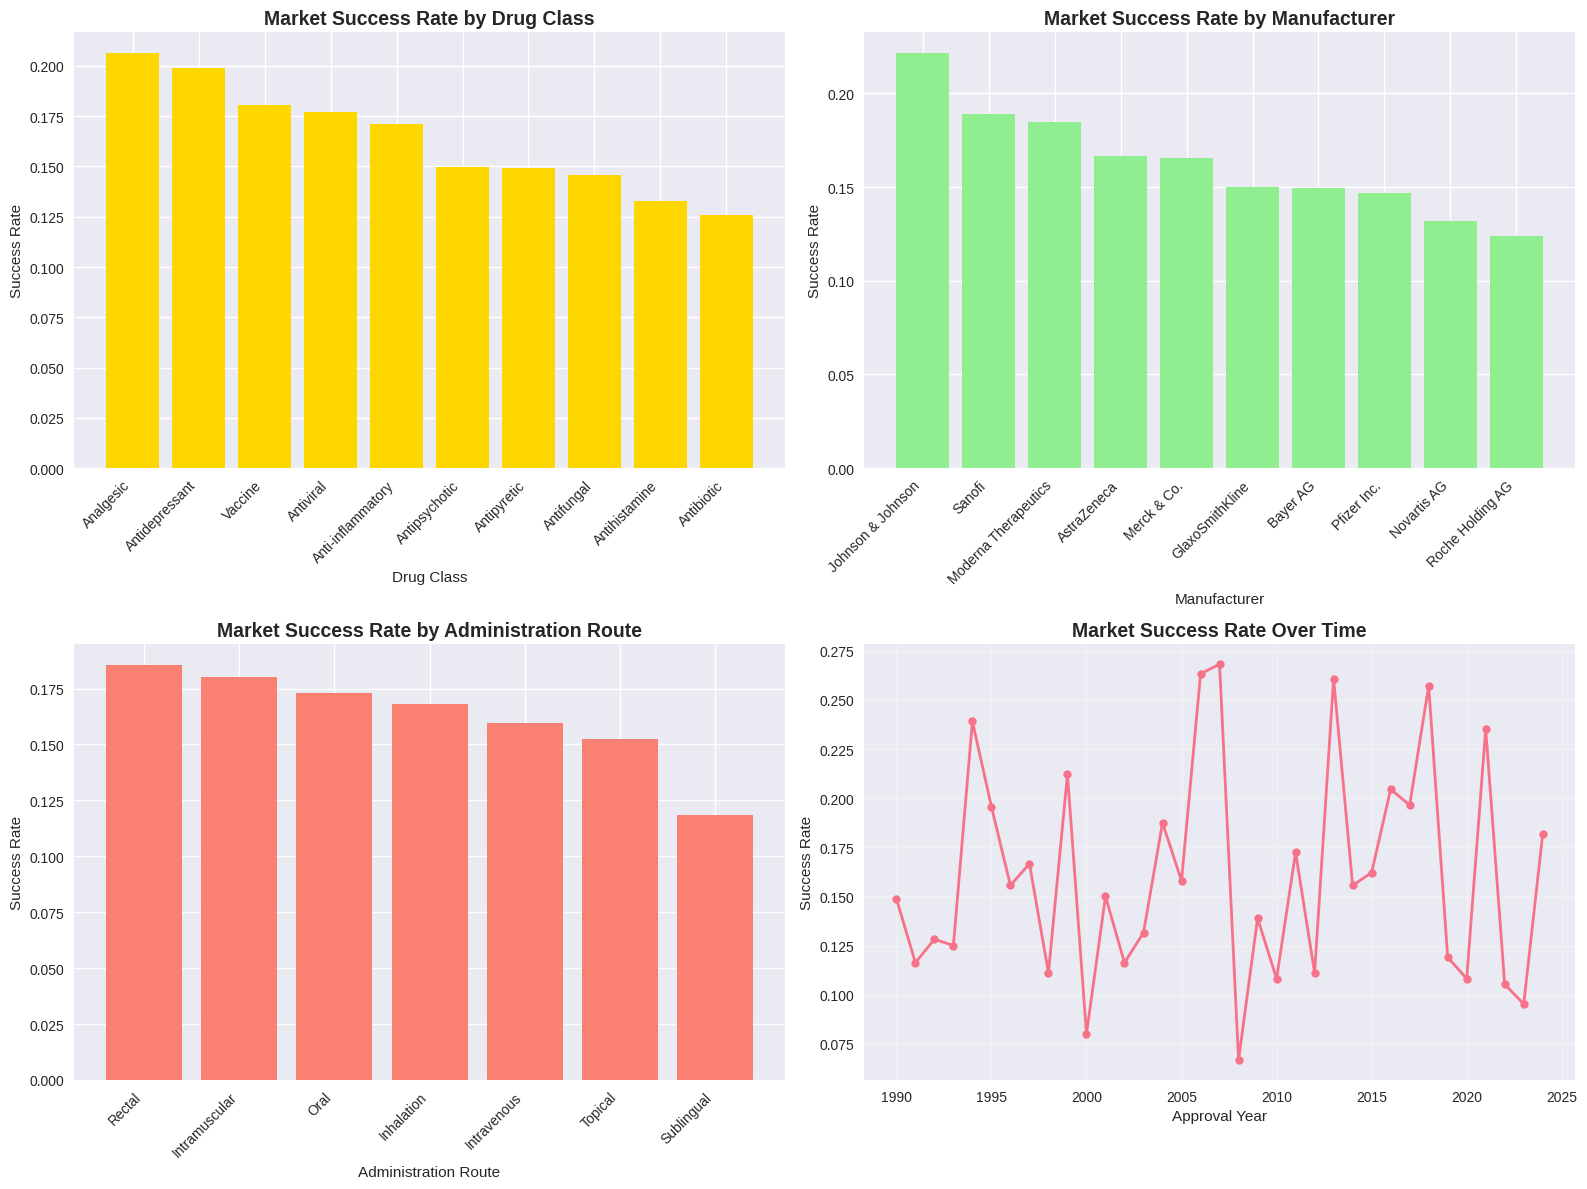


MARKET SUCCESS INSIGHTS:

Top Drug Classes for Success:
drug_class
Analgesic            0.206349
Antidepressant       0.198718
Vaccine              0.180556
Antiviral            0.177305
Anti-inflammatory    0.170886
Name: market_success, dtype: float64

Top Manufacturers for Success:
manufacturer
Johnson & Johnson       0.221477
Sanofi                  0.189189
Moderna Therapeutics    0.184932
AstraZeneca             0.166667
Merck & Co.             0.165605
GlaxoSmithKline         0.150000
Bayer AG                0.149660
Pfizer Inc.             0.147059
Novartis AG             0.131944
Roche Holding AG        0.124088
Name: market_success, dtype: float64

Best Administration Routes:
administration_route
Rectal           0.185567
Intramuscular    0.180258
Oral             0.172897
Inhalation       0.168224
Intravenous      0.159794
Name: market_success, dtype: float64


In [9]:
# Define market success metric
# Success = Approved + Above median price
df['market_success'] = ((df['approval_status'] == 'Approved') & 
                       (df['price_usd'] > df['price_usd'].median())).astype(int)

success_rate = df['market_success'].mean()
print(f"Overall Market Success Rate: {success_rate:.3f} ({success_rate*100:.1f}%)")

# Success factors analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Success by drug class
class_success = df.groupby('drug_class')['market_success'].mean().sort_values(ascending=False)
bars = axes[0,0].bar(range(len(class_success)), class_success.values, color='gold')
axes[0,0].set_title('Market Success Rate by Drug Class', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Drug Class')
axes[0,0].set_ylabel('Success Rate')
axes[0,0].set_xticks(range(len(class_success)))
axes[0,0].set_xticklabels(class_success.index, rotation=45, ha='right')

# Success by manufacturer
mfg_success = df.groupby('manufacturer')['market_success'].mean().sort_values(ascending=False)
bars = axes[0,1].bar(range(len(mfg_success)), mfg_success.values, color='lightgreen')
axes[0,1].set_title('Market Success Rate by Manufacturer', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Manufacturer')
axes[0,1].set_ylabel('Success Rate')
axes[0,1].set_xticks(range(len(mfg_success)))
axes[0,1].set_xticklabels(mfg_success.index, rotation=45, ha='right')

# Success by administration route
route_success = df.groupby('administration_route')['market_success'].mean().sort_values(ascending=False)
bars = axes[1,0].bar(range(len(route_success)), route_success.values, color='salmon')
axes[1,0].set_title('Market Success Rate by Administration Route', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Administration Route')
axes[1,0].set_ylabel('Success Rate')
axes[1,0].set_xticks(range(len(route_success)))
axes[1,0].set_xticklabels(route_success.index, rotation=45, ha='right')

# Success over time
year_success = df.groupby('approval_year')['market_success'].mean()
axes[1,1].plot(year_success.index, year_success.values, marker='o', linewidth=2, markersize=6)
axes[1,1].set_title('Market Success Rate Over Time', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Approval Year')
axes[1,1].set_ylabel('Success Rate')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nMARKET SUCCESS INSIGHTS:")
print("\nTop Drug Classes for Success:")
print(class_success.head())
print("\nTop Manufacturers for Success:")
print(mfg_success)
print("\nBest Administration Routes:")
print(route_success.head())

## 5. Feature Engineering Recommendations for ML Models

In [10]:
print("=== MACHINE LEARNING FEATURE ENGINEERING RECOMMENDATIONS ===")
print("\n1. DRUG APPROVAL PREDICTION MODEL:")
print("   Key Features:")
print("   - drug_class (categorical) - Strong predictor")
print("   - manufacturer (categorical) - Significant impact")
print("   - side_effect_severity (ordinal) - Clear pattern")
print("   - dosage_mg (numerical) - Continuous feature")
print("   - administration_route (categorical)")
print("   - approval_year (numerical) - Temporal trends")
print("   \n   Feature Engineering:")
print("   - One-hot encode categorical variables")
print("   - Create manufacturer success rate feature")
print("   - Parse side_effects text for common effects")
print("   - Create interaction features (class × manufacturer)")

print("\n2. PRICE PREDICTION MODEL:")
print("   Key Features:")
print("   - drug_class (categorical) - Major price driver")
print("   - manufacturer (categorical) - Pricing strategy")
print("   - dosage_mg (numerical) - Moderate correlation")
print("   - administration_route (categorical)")
print("   - side_effect_severity (ordinal)")
print("   \n   Feature Engineering:")
print("   - Log transform price for normal distribution")
print("   - Create price bins for classification approach")
print("   - Manufacturer average price feature")
print("   - Drug class average price feature")

print("\n3. MARKET SUCCESS PREDICTION:")
print("   Target Variable: market_success (Approved + High Price)")
print("   Key Features:")
print("   - All approval prediction features")
print("   - All price prediction features")
print("   - Combined risk score from side effects")
print("   - Temporal trends (approval_year)")

# Feature importance analysis
print("\n=== FEATURE CORRELATION ANALYSIS ===")
numerical_cols = ['dosage_mg', 'price_usd', 'approval_year']
correlation_matrix = df[numerical_cols].corr()
print("\nNumerical Feature Correlations:")
print(correlation_matrix.round(3))

# Create binary encoding for approval status
df['approved'] = (df['approval_status'] == 'Approved').astype(int)
print(f"\nApproval Rate Correlation with Price: {df['approved'].corr(df['price_usd']):.3f}")
print(f"Approval Rate Correlation with Dosage: {df['approved'].corr(df['dosage_mg']):.3f}")

=== MACHINE LEARNING FEATURE ENGINEERING RECOMMENDATIONS ===

1. DRUG APPROVAL PREDICTION MODEL:
   Key Features:
   - drug_class (categorical) - Strong predictor
   - manufacturer (categorical) - Significant impact
   - side_effect_severity (ordinal) - Clear pattern
   - dosage_mg (numerical) - Continuous feature
   - administration_route (categorical)
   - approval_year (numerical) - Temporal trends
   
   Feature Engineering:
   - One-hot encode categorical variables
   - Create manufacturer success rate feature
   - Parse side_effects text for common effects
   - Create interaction features (class × manufacturer)

2. PRICE PREDICTION MODEL:
   Key Features:
   - drug_class (categorical) - Major price driver
   - manufacturer (categorical) - Pricing strategy
   - dosage_mg (numerical) - Moderate correlation
   - administration_route (categorical)
   - side_effect_severity (ordinal)
   
   Feature Engineering:
   - Log transform price for normal distribution
   - Create price bins fo

## 6. Model Performance Expectations

In [11]:
print("=== MODEL PERFORMANCE EXPECTATIONS ===")

# Class balance analysis
print("\n1. CLASSIFICATION CHALLENGES:")
approval_balance = df['approval_status'].value_counts(normalize=True)
print("   Approval Status Balance:")
for status, prop in approval_balance.items():
    print(f"   - {status}: {prop:.3f}")

severity_balance = df['side_effect_severity'].value_counts(normalize=True)
print("\n   Side Effect Severity Balance:")
for severity, prop in severity_balance.items():
    print(f"   - {severity}: {prop:.3f}")

print("\n2. RECOMMENDED ALGORITHMS:")
print("   Drug Approval Prediction:")
print("   - Random Forest (handles categorical features well)")
print("   - Gradient Boosting (XGBoost/LightGBM)")
print("   - Logistic Regression (interpretable baseline)")

print("\n   Price Prediction:")
print("   - Random Forest Regression")
print("   - Gradient Boosting Regression")
print("   - Linear Regression (with feature engineering)")

print("\n3. EVALUATION METRICS:")
print("   Classification Models:")
print("   - Accuracy, Precision, Recall, F1-Score")
print("   - ROC-AUC for probability predictions")
print("   - Confusion Matrix analysis")

print("\n   Regression Models:")
print("   - RMSE, MAE for price prediction")
print("   - R² for explained variance")
print("   - MAPE for percentage error")

print("\n4. CROSS-VALIDATION STRATEGY:")
print("   - Stratified K-Fold for classification")
print("   - Time-based split if temporal patterns important")
print("   - Manufacturer-based split for generalization testing")

=== MODEL PERFORMANCE EXPECTATIONS ===

1. CLASSIFICATION CHALLENGES:
   Approval Status Balance:
   - Pending: 0.345
   - Rejected: 0.333
   - Approved: 0.322

   Side Effect Severity Balance:
   - Mild: 0.341
   - Moderate: 0.336
   - Severe: 0.323

2. RECOMMENDED ALGORITHMS:
   Drug Approval Prediction:
   - Random Forest (handles categorical features well)
   - Gradient Boosting (XGBoost/LightGBM)
   - Logistic Regression (interpretable baseline)

   Price Prediction:
   - Random Forest Regression
   - Gradient Boosting Regression
   - Linear Regression (with feature engineering)

3. EVALUATION METRICS:
   Classification Models:
   - Accuracy, Precision, Recall, F1-Score
   - ROC-AUC for probability predictions
   - Confusion Matrix analysis

   Regression Models:
   - RMSE, MAE for price prediction
   - R² for explained variance
   - MAPE for percentage error

4. CROSS-VALIDATION STRATEGY:
   - Stratified K-Fold for classification
   - Time-based split if temporal patterns importa